In [6]:
############# Data Analysis & Calculation ##############

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df1=pd.read_csv(r"C:\Users\cheta\Downloads\Task 2\index_1.csv")
df2=pd.read_csv(r"C:\Users\cheta\Downloads\Task 2\index_2.csv")

In [8]:
print(df1)
print(df1.info())
print('\nTotal duplicate : ',df1.duplicated().sum())

            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
3631  2025-03-23  2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23  2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23  2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23  2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23  2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  
0     38.70          Latte  
1     38.70  Hot Chocolate  


In [9]:
print(df2)
print(df2.info())
print('\nTotal duplicate : ', df2.duplicated().sum())

           date          datetime cash_type  money                 coffee_name
0    08-02-2025  08-02-2025 14:26      cash     15                         Tea
1    08-02-2025  08-02-2025 14:28      cash     15                         Tea
2    08-02-2025  08-02-2025 14:33      card     20                    Espresso
3    08-02-2025  08-02-2025 15:51      card     30       Chocolate with coffee
4    08-02-2025  08-02-2025 16:35      cash     27         Chocolate with milk
..          ...               ...       ...    ...                         ...
257  23-03-2025  23-03-2025 14:55      cash     30                  Cappuccino
258  23-03-2025  23-03-2025 15:15      card     25               Irish whiskey
259  23-03-2025  23-03-2025 17:59      card     28             Super chocolate
260  23-03-2025  23-03-2025 18:01      card     28  Vanilla with Irish whiskey
261  23-03-2025  23-03-2025 21:23      card     29   Coffee with Irish whiskey

[262 rows x 5 columns]
<class 'pandas.core.frame.Da

In [11]:
#drop duplicate df2
df2 = df2.drop_duplicates()

In [12]:
#merge df1 and df2
df = pd.concat([df1, df2])

In [14]:
print(df)
print(df.info())
print('\nTotal duplicate : ',df.duplicated().sum())

           date                 datetime cash_type                 card  \
0    2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1    2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2    2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3    2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4    2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
..          ...                      ...       ...                  ...   
257  23-03-2025         23-03-2025 14:55      cash                  NaN   
258  23-03-2025         23-03-2025 15:15      card                  NaN   
259  23-03-2025         23-03-2025 17:59      card                  NaN   
260  23-03-2025         23-03-2025 18:01      card                  NaN   
261  23-03-2025         23-03-2025 21:23      card                  NaN   

     money                 coffee_name  
0     38.7                       Latte  
1     38.7       

In [15]:
#drop duplicate df2
df2 = df2.drop_duplicates()

In [16]:
#merge df1 and df2
df = pd.concat([df1, df2])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3896 non-null   object 
 1   datetime     3896 non-null   object 
 2   cash_type    3896 non-null   object 
 3   card         3547 non-null   object 
 4   money        3896 non-null   float64
 5   coffee_name  3896 non-null   object 
dtypes: float64(1), object(5)
memory usage: 213.1+ KB


In [18]:
# Convert 'date' column assuming day-month-year format
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Convert 'datetime' column (also assuming possible mixed formats)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', dayfirst=True)


In [19]:
df.describe()

,date,datetime,money
count,1446,1446,3896.000000
mean,2024-10-05 22:49:17.676348672,2024-10-06 13:26:22.248473856,31.383876
min,2024-01-03 00:00:00,2024-01-03 10:15:50.520000,15.000000
25%,2024-05-07 00:00:00,2024-05-07 22:18:16.729250048,27.920000
50%,2024-09-06 00:00:00,2024-09-06 12:12:15.853500160,32.820000
75%,2025-03-02 00:00:00,2025-03-02 07:04:33.624249856,35.760000
max,2025-12-03 00:00:00,2025-12-03 18:42:13.656000,40.000000
std,NaN,NaN,5.063845


In [20]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['year_month']=df['datetime'].dt.strftime('%m-%y')
df['hour']=df['datetime'].dt.hour

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 261
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1446 non-null   datetime64[ns]
 1   datetime     1446 non-null   datetime64[ns]
 2   cash_type    3896 non-null   object        
 3   card         3547 non-null   object        
 4   money        3896 non-null   float64       
 5   coffee_name  3896 non-null   object        
 6   year         1446 non-null   float64       
 7   month        1446 non-null   float64       
 8   year_month   1446 non-null   object        
 9   hour         1446 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 334.8+ KB


In [22]:
# Putting feature variable to X
X = df.drop('money', axis= 1)

# Putting response variable to y
y = df['money']

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=120)

In [23]:
new = pd.concat([y_train, X_train], axis=1)
new.head()

,money,date,datetime,cash_type,card,coffee_name,year,month,year_month,hour
74,30.00,NaT,NaT,card,NaN,Cappuccino,NaN,NaN,NaN,NaN
1028,32.82,NaT,NaT,card,ANON-0000-0000-0009,Latte,NaN,NaN,NaN,NaN
590,29.00,NaT,NaT,cash,NaN,Americano,NaN,NaN,NaN,NaN
971,32.82,NaT,NaT,card,ANON-0000-0000-0376,Latte,NaN,NaN,NaN,NaN
3039,25.96,2025-11-02,2025-11-02 10:38:26.035,card,ANON-0000-0000-1163,Americano,2025.0,11.0,11-25,10.0


In [24]:
df['hour']=df['datetime'].dt.hour
df

,date,datetime,cash_type,card,money,coffee_name,year,month,year_month,hour
0,2024-01-03,2024-01-03 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024.0,1.0,01-24,10.0
1,2024-01-03,2024-01-03 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024.0,1.0,01-24,12.0
2,2024-01-03,2024-01-03 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024.0,1.0,01-24,12.0
3,2024-01-03,2024-01-03 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024.0,1.0,01-24,13.0
4,2024-01-03,2024-01-03 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024.0,1.0,01-24,13.0
...,...,...,...,...,...,...,...,...,...,...
257,NaT,NaT,cash,NaN,30.0,Cappuccino,NaN,NaN,NaN,NaN
258,NaT,NaT,card,NaN,25.0,Irish whiskey,NaN,NaN,NaN,NaN
259,NaT,NaT,card,NaN,28.0,Super chocolate,NaN,NaN,NaN,NaN
260,NaT,NaT,card,NaN,28.0,Vanilla with Irish whiskey,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Money vs coffee_name'}, xlabel='money', ylabel='coffee_name'>

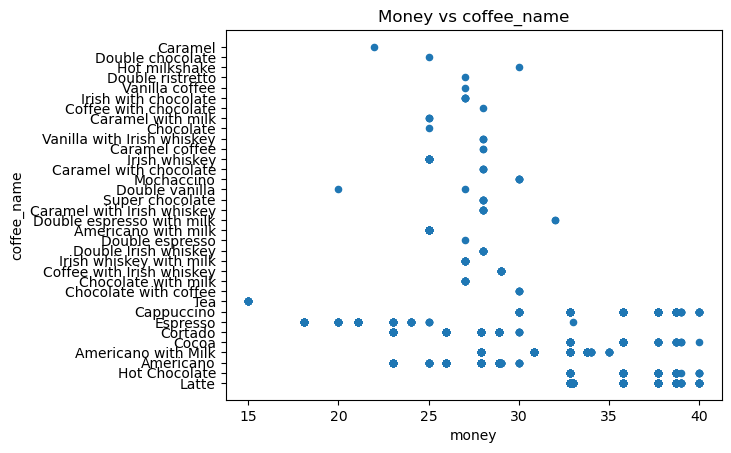

In [25]:
df.plot.scatter(x='money', y='coffee_name', title='Money vs coffee_name')

# Data Vizualization

In [26]:
hourly_Sales=df['hour'].value_counts().sort_index()

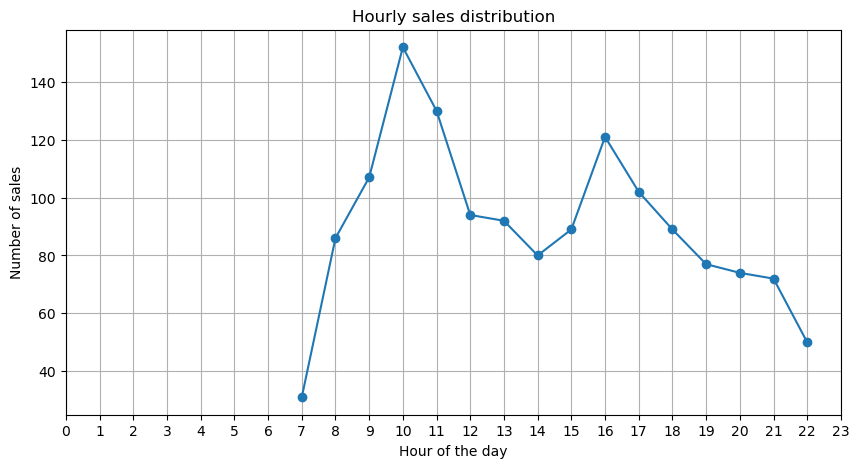

In [27]:
plt.figure(figsize=(10,5))
plt.plot(hourly_Sales.index,hourly_Sales.values,marker='o')
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of sales')
plt.title('Hourly sales distribution')
plt.grid(True)
plt.show()

In [28]:
coffee_sales=df.groupby(['coffee_name'])['money'].sum().reset_index()
coffee_sales.sort_values(by='money',ascending=False)

,coffee_name,money
28,Latte,28658.30
1,Americano with Milk,25269.12
3,Cappuccino,18514.14
0,Americano,15437.26
23,Hot Chocolate,10172.46
12,Cocoa,8678.16
15,Cortado,7534.86
22,Espresso,3187.28
2,Americano with milk,1050.00
25,Irish whiskey,525.00


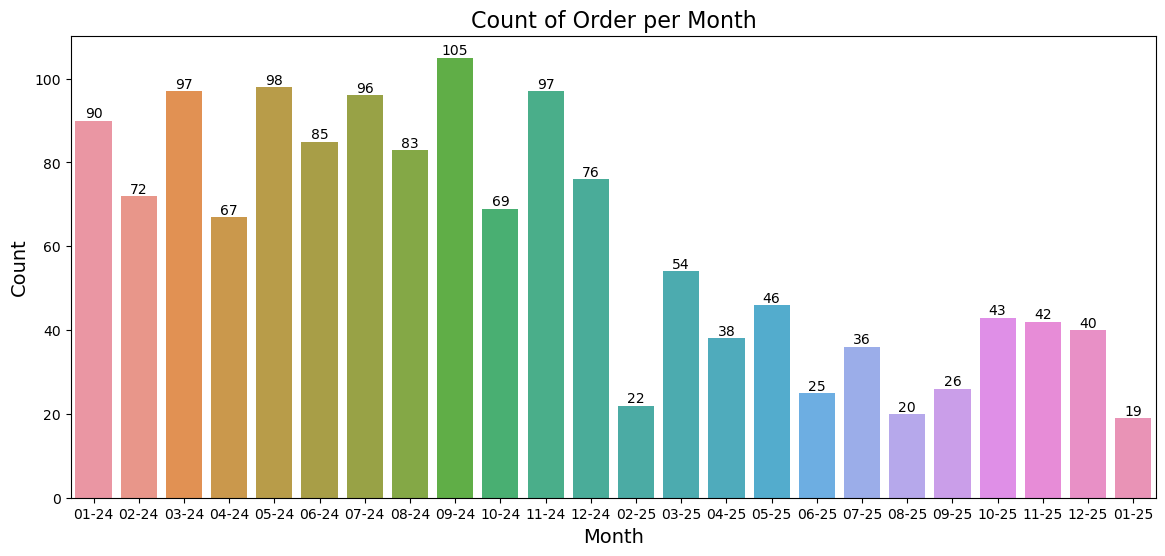

In [29]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="year_month", data=df)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Order per Month", fontsize=16)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

cash_type
card    3729
cash     167
Name: count, dtype: int64


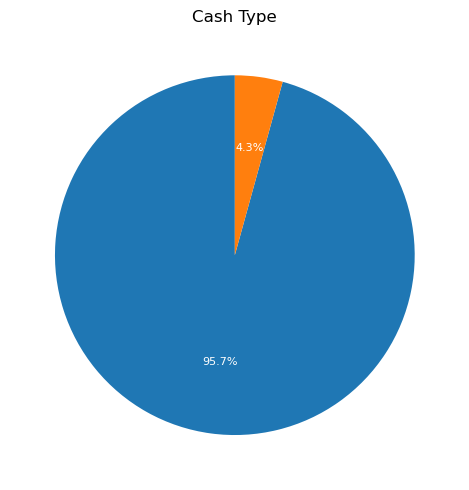

In [30]:
cash_type = df['cash_type'].value_counts()
print(cash_type)

plt.figure(figsize=(6, 5))
plt.pie(cash_type,labels=cash_type.index,autopct='%1.1f%%',startangle=90, textprops={'color': 'white', 'fontsize': 8})
plt.title('Cash Type')

plt.tight_layout()
plt.show()

Total Revenue per Month in 2024
   year_month    money
0       01-24  2927.96
2       02-24  2322.04
4       03-24  3126.86
6       04-24  2158.10
8       05-24  3158.64
10      06-24  2757.68
12      07-24  2976.14
14      08-24  2585.14
16      09-24  3338.08
18      10-24  2221.22
20      11-24  3157.28
22      12-24  2366.26


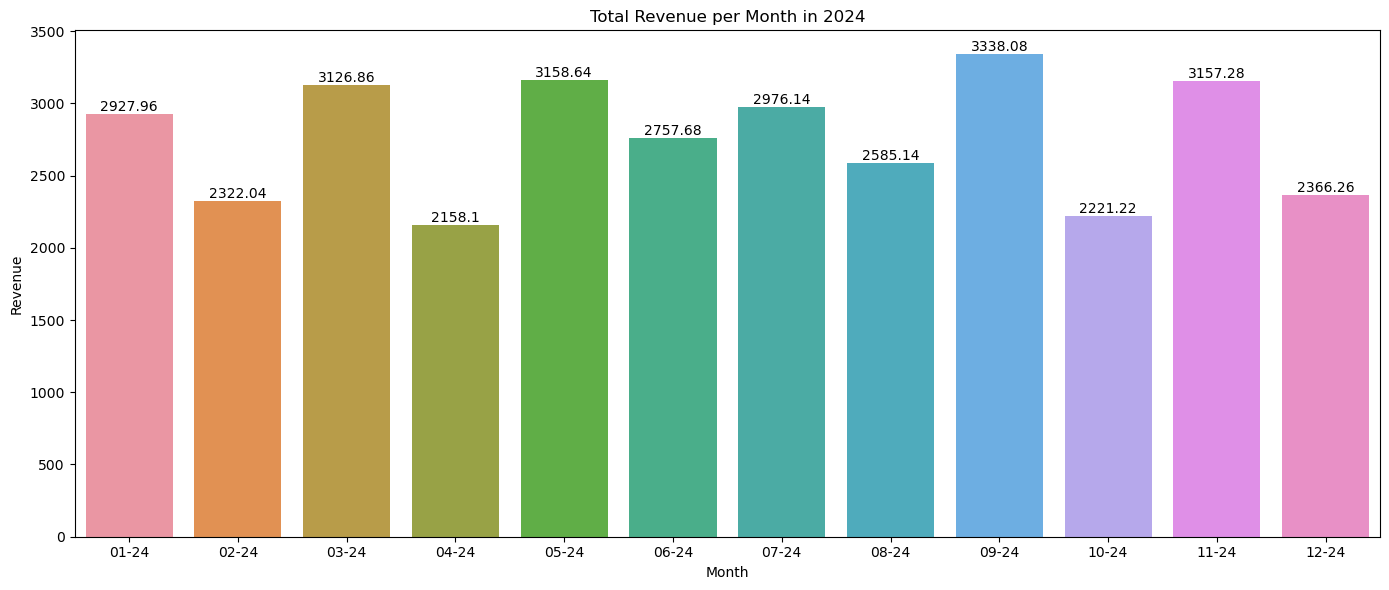

Total Revenue per Month in 2025
   year_month    money
1       01-25   591.24
3       02-25   713.22
5       03-25  1744.84
7       04-25  1148.18
9       05-25  1448.96
11      06-25   791.10
13      07-25  1169.76
15      08-25   573.10
17      09-25   812.16
19      10-25  1380.88
21      11-25  1340.22
23      12-25  1268.70


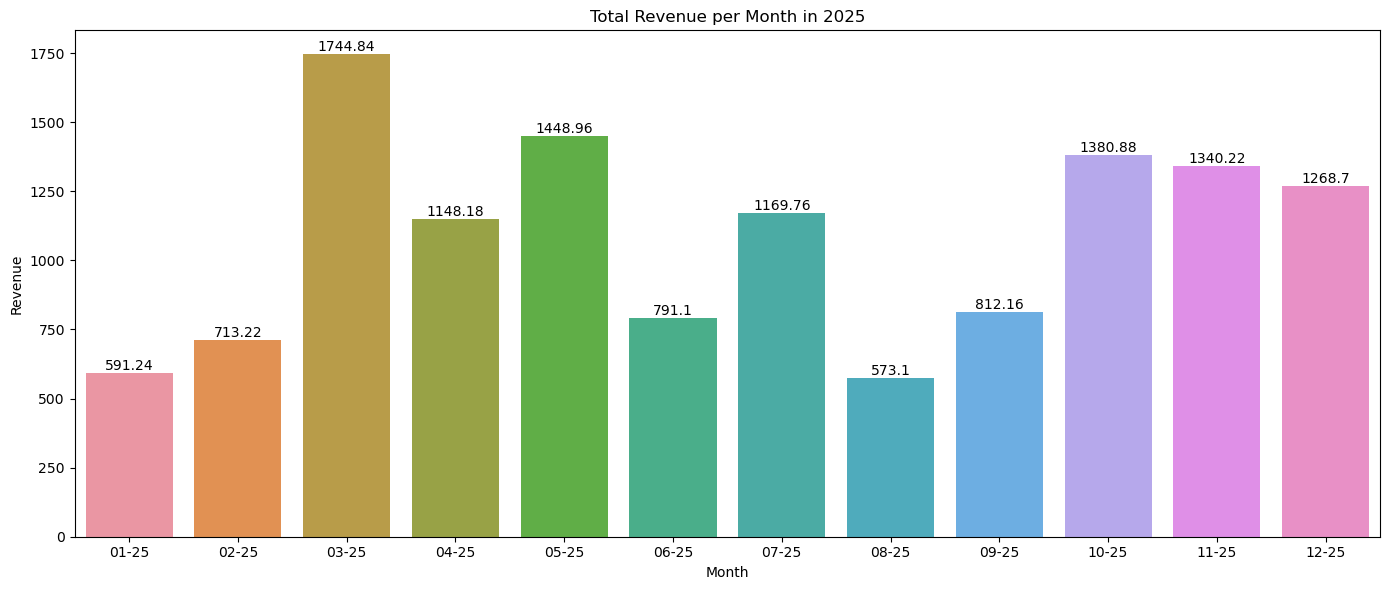

In [31]:
revenue = df.groupby('year_month')['money'].sum().reset_index()
revenue_2024 = revenue[revenue['year_month'].str.contains('24$')]
revenue_2025 = revenue[revenue['year_month'].str.contains('25$')]

print('Total Revenue per Month in 2024')
print(revenue_2024)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data = revenue_2024,
    x = 'year_month',
    y = 'money',
)
plt.title('Total Revenue per Month in 2024')
plt.xlabel('Month')
plt.ylabel('Revenue')
for container in ax.containers:
    ax.bar_label(container)


plt.tight_layout()
plt.show()

print('Total Revenue per Month in 2025')
print(revenue_2025)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data = revenue_2025,
    x = 'year_month',
    y = 'money',
)
plt.title('Total Revenue per Month in 2025')
plt.xlabel('Month')
plt.ylabel('Revenue')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [32]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk           824
Latte                         806
Americano                     593
Cappuccino                    517
Cortado                       292
Hot Chocolate                 282
Cocoa                         243
Espresso                      152
Americano with milk            42
Irish whiskey                  21
Tea                            16
Coffee with Irish whiskey      16
Irish whiskey with milk        15
Chocolate with milk            12
Double Irish whiskey           12
Caramel with Irish whiskey      8
Super chocolate                 6
Mochaccino                      5
Chocolate with coffee           5
Irish with chocolate            5
Caramel with chocolate          4
Vanilla with Irish whiskey      3
Caramel with milk               3
Double espresso with milk       2
Double vanilla                  2
Caramel coffee                  2
Double ristretto                1
Double chocolate                1
Hot milkshake                   1
Ch

In [33]:
x=df['year_month'].unique().tolist()

In [34]:
for i in range(0,len(x)):
    z = df[df['year_month']==x[i]].groupby('year_month')['coffee_name'].value_counts()
    print('Order',x[i])
    print(z)
    print()

Order 01-24
year_month  coffee_name        
01-24       Americano with Milk    36
            Latte                  16
            Cappuccino             10
            Americano               8
            Cocoa                   8
            Hot Chocolate           7
            Cortado                 4
            Espresso                1
Name: count, dtype: int64

Order 02-24
year_month  coffee_name        
02-24       Americano with Milk    22
            Latte                  15
            Americano              12
            Cappuccino              9
            Cortado                 5
            Hot Chocolate           5
            Cocoa                   3
            Espresso                1
Name: count, dtype: int64

Order 03-24
year_month  coffee_name        
03-24       Americano with Milk    33
            Latte                  18
            Cappuccino             11
            Cocoa                   9
            Cortado                 9
            Hot 

In [35]:
top=coffee_sales.nlargest(9,'money')
top

,coffee_name,money
28,Latte,28658.30
1,Americano with Milk,25269.12
3,Cappuccino,18514.14
0,Americano,15437.26
23,Hot Chocolate,10172.46
12,Cocoa,8678.16
15,Cortado,7534.86
22,Espresso,3187.28
2,Americano with milk,1050.00


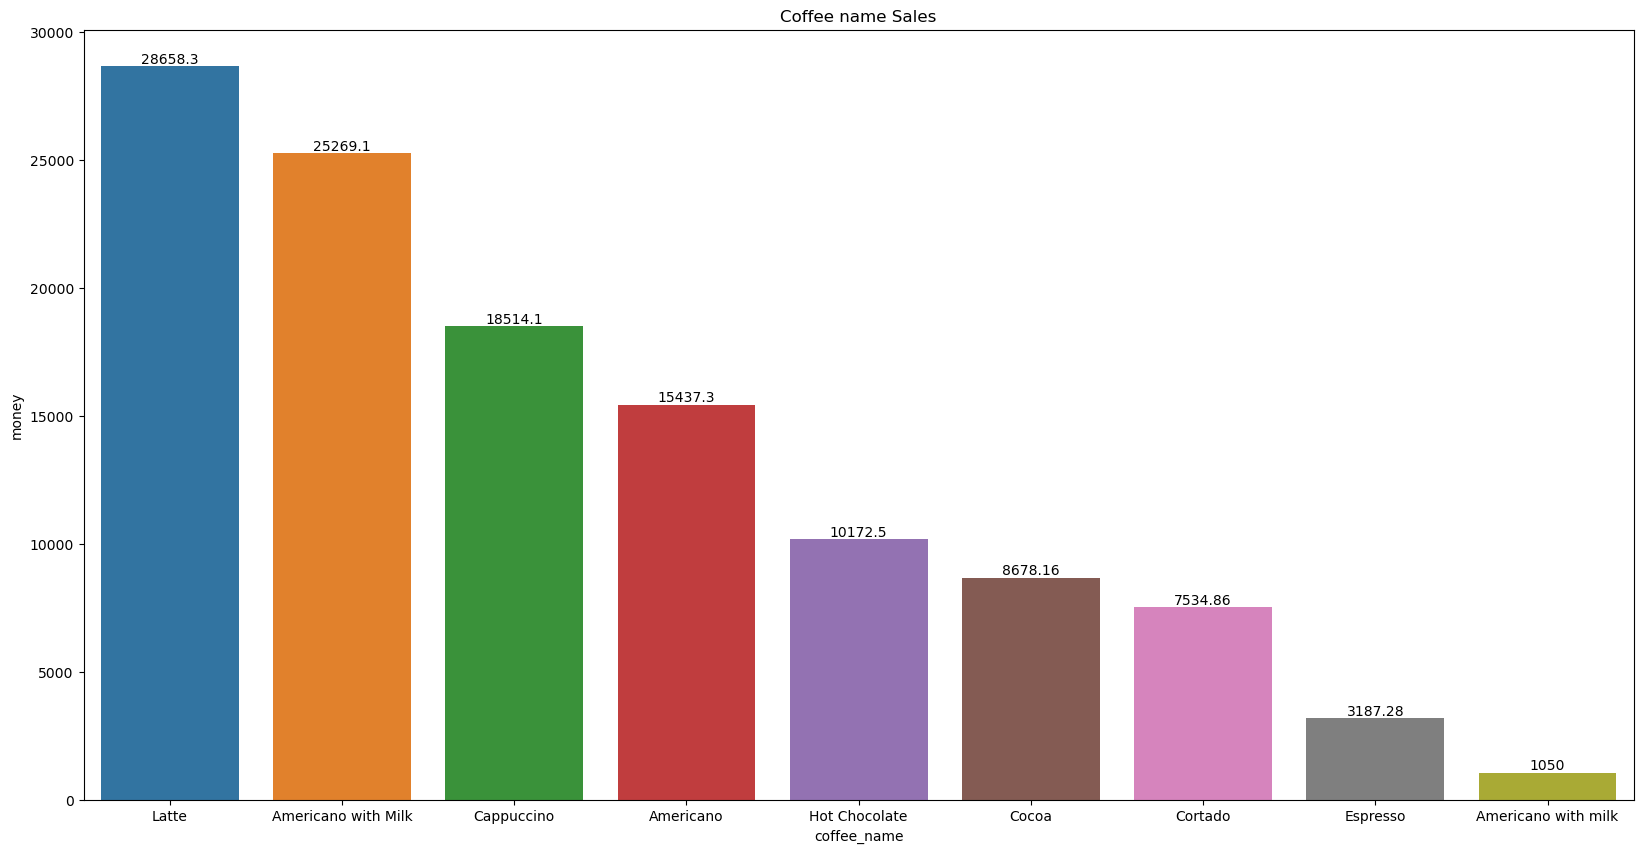

In [36]:
plt.figure(figsize=(20,10))
plt.title('Coffee name Sales')
plt.xlabel('Coffee name')
plt.ylabel('Sales')
x=sns.barplot(x='coffee_name',y='money',data=top)
for contanier in x.containers:
    x.bar_label(contanier)
plt.show()